In [5]:
pip install alpaca-trade-api

Note: you may need to restart the kernel to use updated packages.


In [186]:
# Initial imports
import os
import requests
import json
import pandas as pd
from pprint import pprint
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [187]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [188]:
# Set current amount of crypto assets

my_btc = 1.2
my_ETH = 5.3


In [135]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [189]:
ticker = "BTC"

# Fetch current BTC price
request_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

# Submit request and format output
response_data = requests.get(request_url).json()
print(json.dumps(response_data, indent=4))

# Select fact 
response_data["data"]["1"]["quotes"]["CAD"]["price"]

pprint(response_data["data"]["1"]["quotes"]["CAD"]["price"])

current_BTC_price = response_data["data"]["1"]["quotes"]["CAD"]["price"]

#response_data.keys()


# Fetch current ETH price
request_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Submit request and format output
response_data = requests.get(request_url).json()
print(json.dumps(response_data, indent=4))

# Select fact 
response_data["data"]["1027"]["quotes"]["CAD"]["price"]

pprint(response_data["data"]["1027"]["quotes"]["CAD"]["price"])

current_ETH_price = response_data["data"]["1027"]["quotes"]["CAD"]["price"]

#response_data.keys()

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18525831,
            "total_supply": 18525831,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13056.0,
                    "volume_24h": 19677379024,
                    "market_cap": 241819983204,
                    "percentage_change_1h": -0.549935660391931,
                    "percentage_change_24h": 2.14348232219661,
                    "percentage_change_7d": 15.3448670865027,
                    "percent_change_1h": -0.549935660391931,
                    "percent_change_24h": 2.14348232219661,
                    "percent_change_7d": 15.3448670865027
                },
                "CAD": {
                    "price": 17139.9168,
                    "volume_24h": 25832463182.7072,
                    "

In [190]:

# Compute current value of my crpto
my_btc_value = my_BTC * current_BTC_price
my_eth_value = my_ETH * current_ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20567.90
The current value of your 5.3 ETH is $2870.74


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [191]:
# Current amount of shares

my_agg = 200
my_spy = 50


In [192]:

# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [193]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current price data for AGG and SPY
df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_shares


AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3933253  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45033179

In [194]:

# Pick AGG and SPY close prices

agg_close_price = float(df_shares["AGG"]["close"])
spy_close_price = float(df_shares["SPY"]["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [195]:

# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")



The current value of your 50 SPY shares is $17231.50
The current value of your 200 AGG shares is $23462.00


### Savings Health Analysis

In [196]:
# Set monthly household income
monthly_income = 12000

total_Crypto = my_btc_value + my_eth_value

total_Shares = my_agg_value + my_spy_value

# Set current amount of savings
savings_data = {
    "amount": [ total_Crypto, total_Shares ]
}

# Set the tickers
tickers = ["Crypto", "Shares"]

#Create savings DataFrame with 'tickers' as index
df_savings = pd.DataFrame(savings_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,23438.635366
Shares,40693.500000


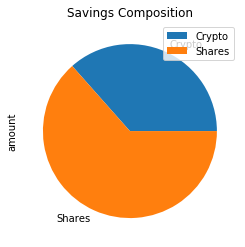

In [198]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Composition")

In [199]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = total_Crypto + total_Shares


print(emergency_fund)
print(total_amount_savings)

# Validate saving health

if total_amount_savings < emergency_fund:
    print("Total amount of savings is less than emergency fund, hence savings health is not good.")
elif total_amount_savings > emergency_fund:
    print("Total amount of savings is greater than emergency fund, hence savings health is good.")
else:
    print("Total amount of savings is equal to emergency fund, hence savings health is on break even point.")



36000
64132.1353656
Total amount of savings is greater than emergency fund, hence savings health is good.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [200]:
# Set the ticker
tickers = ["SPY","AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-22', tz='America/New_York').isoformat()

In [201]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head(10)

AGG                                         \
                             open      high       low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.0500  109.8300  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.6900  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.0500  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.4200  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.4600  109.1536  109.44  3485420.0   
2015-11-02 00:00:00-05:00  109.08  109.1900  108.9811  109.04  3257772.0   
2015-11-03 00:00:00-05:00  108.95  108.9956  108.7900  108.84  2269259.0   
2015-11-04 00:00:00-05:00  108.91  108.9900  108.7100  108.83  2976533.0   

                              SPY                                       
                             open    high       low   close     volume  
2015-10-22 00:00:00-04:00  202.98  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.25  207.95  206.3000  207.51  103135843  
2015-10-26 00:00:00-04:00  207.30  207.37  206.5600  206.97   51484043  
2015-10-27 00:00:00-04:00  206.20  207.00  205.7900  206.58   62899344  
2015-10-28 00:00:00-04:00  206.97  208.97  206.2100  208.96  115482088  
2015-10-29 00:00:00-04:00  208.34  209.27  208.2100  208.87   64052955  
2015-10-30 00:00:00-04:00  209.06  209.44  207.8300  207.85   91063424  
2015-11-02 00:00:00-05:00  208.32  210.62  208.1700  210.37   70110064  
2015-11-03 00:00:00-05:00  209.97  211.66  209.7000  210.96   69592217  
2015-11-04 00:00:00-05:00  211.35  211.50  209.7201  210.38   75445431

In [202]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [203]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [204]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999818,0.995323,1.007119,1.005167,0.998747,0.997497,1.002250,1.009464,0.995888,0.990773,...,1.003888,1.006200,1.000491,1.002995,0.997467,0.997181,1.003083,1.007723,1.011760,0.998042
2,0.994194,0.994632,1.014552,1.006460,0.996264,0.992235,1.014553,1.009348,0.994186,0.987205,...,1.011627,1.007451,0.991006,1.001849,0.998442,0.993955,1.001396,1.005855,1.017930,0.995939
3,0.993570,0.987042,1.024837,1.004178,1.001226,0.985695,1.019616,1.007766,0.993120,0.987030,...,1.005751,1.011424,0.989684,1.004400,1.002157,0.997977,0.997370,1.008561,1.019830,0.997504
4,0.994995,0.984601,1.026378,1.007152,1.001686,0.985684,1.025924,1.002490,1.006671,0.987382,...,1.009325,1.004374,0.993954,1.007309,1.002562,1.007373,1.007939,1.005871,1.016155,1.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.077396,2.796522,8.051448,9.993915,6.329814,2.666866,2.702621,15.115453,5.692584,6.979668,...,4.390055,9.502656,8.844561,3.722213,3.648282,4.524141,3.218217,6.989381,4.688735,5.465446
7557,6.122711,2.787774,8.063399,9.989241,6.381703,2.669036,2.695156,15.070422,5.636855,6.914144,...,4.360193,9.523497,8.831324,3.725749,3.642189,4.466558,3.182270,6.957646,4.656167,5.448740
7558,6.152912,2.822231,8.108234,9.977195,6.347597,2.634172,2.702307,14.980797,5.632626,6.893432,...,4.371751,9.555564,8.766513,3.720407,3.643606,4.473856,3.217714,6.932807,4.621509,5.408558
7559,6.166412,2.831751,8.089400,9.948190,6.362763,2.628272,2.705856,14.948265,5.651596,6.891682,...,4.385227,9.432849,8.714377,3.736905,3.661340,4.463983,3.237162,6.938706,4.638705,5.368746


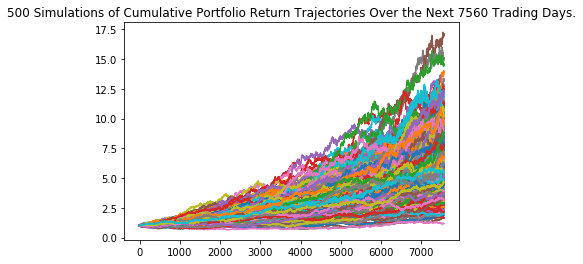

In [205]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

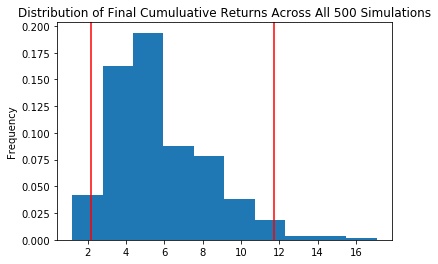

In [206]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [207]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              5.743361
std               2.478962
min               1.178619
25%               4.040200
50%               5.141988
75%               7.191366
max              17.073047
95% CI Lower      2.157404
95% CI Upper     11.714688
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [208]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43148.08 and $234293.76


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [209]:
# Set initial investment
initial_investment = 20000 * 1.5

print(initial_investment)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

30000.0
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64722.13 and $351440.65


# Optional Challenge - Early Retirement

## Five Years Retirement Option

In [210]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [211]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [212]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010196,1.001235,0.997290,1.001274,1.002417,0.995670,1.008325,1.000414,0.991687,1.000698,...,0.998664,1.007680,0.997165,0.994410,1.006583,0.997896,0.988082,0.999993,1.003591,1.000326
2,1.005632,0.997776,1.001697,0.995390,0.997857,0.996598,1.005878,1.005069,1.000471,0.996963,...,1.003637,1.001653,0.995847,0.991504,1.006796,0.999226,0.987360,1.003499,1.001698,0.995284
3,1.007255,0.999049,1.006027,0.994026,0.995194,0.995781,0.999938,1.010400,0.997623,0.998563,...,1.003696,1.000061,0.998569,0.993886,1.005552,0.994471,0.985632,1.000837,1.005205,0.987676
4,1.002442,0.992702,1.005887,1.000795,0.991794,0.990057,1.003148,1.000105,0.993581,0.998578,...,1.004157,0.997595,1.001421,0.991584,1.006407,0.991249,0.987949,0.999571,1.008908,0.987026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.150066,1.304061,1.738913,1.319589,1.605243,1.435049,1.208823,1.338184,1.369916,1.045865,...,1.173033,1.321709,1.408983,1.638185,1.327652,0.886832,1.237134,1.163087,1.463562,1.470888
1257,1.144914,1.299663,1.745102,1.316448,1.601309,1.439439,1.215130,1.340716,1.375487,1.041349,...,1.178347,1.314602,1.411681,1.642789,1.329017,0.884922,1.237480,1.171278,1.467585,1.470860
1258,1.150721,1.294932,1.737234,1.309928,1.600280,1.444644,1.214463,1.334124,1.383037,1.045194,...,1.177029,1.311472,1.416141,1.636677,1.329775,0.884312,1.237646,1.169286,1.461170,1.472090
1259,1.151688,1.292336,1.751857,1.309443,1.609477,1.439659,1.219521,1.340531,1.384510,1.038505,...,1.173678,1.310778,1.401615,1.632513,1.328075,0.888082,1.226331,1.174723,1.458901,1.473185


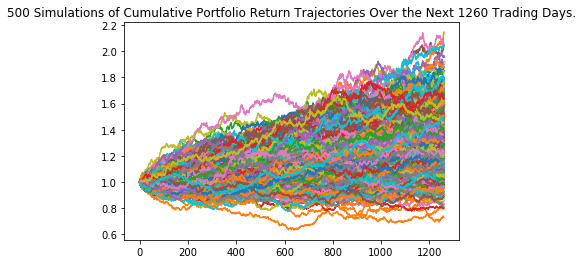

In [213]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

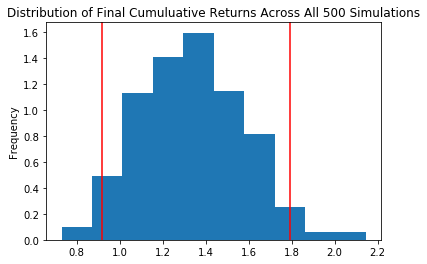

In [214]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [215]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.339601
std               0.238244
min               0.729885
25%               1.162232
50%               1.331376
75%               1.502539
max               2.145729
95% CI Lower      0.915960
95% CI Upper      1.792642
Name: 1260, dtype: float64


In [216]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*100000,2)
ci_upper_five = round(tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $91595.99 and $179264.16


## Ten Years Retirement Option

In [217]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.70,.30],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [218]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997057,1.005597,0.996310,0.999893,0.992873,0.999845,1.001771,1.001429,1.008189,1.000303,...,0.998097,1.001004,1.000004,1.003563,0.996940,1.009511,1.008267,1.000286,1.004794,1.005317
2,0.996905,1.008559,1.005365,0.993659,0.996736,0.997707,1.004022,0.994924,1.010653,1.001567,...,1.004423,1.009260,0.999933,1.002933,1.001462,1.009900,1.004795,1.001172,1.004106,1.004337
3,1.003525,1.008578,1.007098,0.990213,0.998472,1.000826,1.005676,0.996455,1.008903,1.003902,...,1.001140,1.016101,0.996313,1.004058,0.993005,1.011137,1.009983,0.999620,1.011464,1.006436
4,1.000748,1.012525,1.003362,0.996180,1.003201,1.003276,1.014870,1.002984,1.013374,0.998050,...,0.993901,1.010761,0.999965,1.003615,0.995970,1.009753,1.009525,1.004277,1.014312,1.014146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.646793,1.516583,1.425651,0.895134,1.663290,1.984893,1.797147,1.421295,1.348038,1.686921,...,1.397684,1.801839,1.440426,0.972361,1.413569,2.279184,1.440916,2.283113,1.510501,1.885712
2517,1.656758,1.513732,1.423980,0.897113,1.662768,1.986209,1.811606,1.420035,1.348536,1.683648,...,1.402484,1.790745,1.453050,0.981014,1.407080,2.278819,1.437138,2.271171,1.512296,1.868089
2518,1.659913,1.520919,1.420133,0.899230,1.656010,1.984446,1.810808,1.413989,1.351724,1.674945,...,1.396923,1.778159,1.450516,0.979192,1.404985,2.292096,1.432556,2.272731,1.512246,1.862184
2519,1.653751,1.524439,1.424250,0.894743,1.661602,1.976930,1.810559,1.417679,1.348509,1.673084,...,1.392919,1.770590,1.451547,0.977145,1.405592,2.304913,1.441422,2.282841,1.504310,1.852963


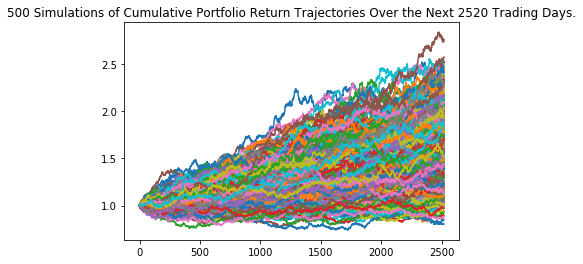

In [219]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

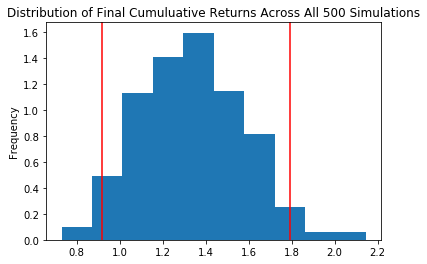

In [220]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [221]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)


count           500.000000
mean              1.339601
std               0.238244
min               0.729885
25%               1.162232
50%               1.331376
75%               1.502539
max               2.145729
95% CI Lower      0.915960
95% CI Upper      1.792642
Name: 1260, dtype: float64


In [222]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*20000,2)
ci_upper_ten = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18319.2 and $35852.83
